# Data preprocessing

This file will be shared be included in other files.

# Loading data

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./data/online_retail.csv', index_col=False)

In [3]:
df.shape

(1067371, 8)

In [4]:
df.sample(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
762637,557804,23321,SMALL WHITE HEART OF WICKER,12,2011-06-23 10:24:00,1.65,18198.0,United Kingdom
194102,507879,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,10,2010-05-11 15:03:00,0.18,16805.0,United Kingdom


In [5]:
df.shape

(1067371, 8)

# Data cleaning and formmating

## Convert InvoiceDate to datatime format

In [6]:
# ,format='%d-%m-%Y %H:%M'
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'])
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

## Removing Null values

In [7]:
null_perc = round(100*(df.isnull().sum())/len(df), 2)
print(f'Null percentage in "Customer ID": {null_perc["Customer ID"]} %')

Null percentage in "Customer ID": 22.77 %


~22% of customers are without IDs. Hence, we cannot identify the user for the transcation and can be safely deleted.

In [8]:
df_proc = df.dropna(axis=0, ignore_index=True)

In [9]:
print(f'Minimum Quantity: {df_proc.min()["Quantity"]}')

Minimum Quantity: -80995


From previous, we can see that "Quantity" includes negative values, which is upnormal in our use case.

In [10]:
negativePerc = round((df_proc[df_proc["Invoice"].str.contains("C", na = False)].count()["Invoice"]/len(df_proc))*100, 2)
print(f"Percentage of Negative values: {negativePerc}%")

Percentage of Negative values: 2.27%


In [11]:
# Remove row containing "C" in the "Invoice" column as it contains negative values.
df_proc = df_proc[~df_proc["Invoice"].str.contains("C", na = False)]

## Removing Outliers

In [12]:
df_proc[["Quantity", "Price"]]

,Quantity,Price
0,12,6.95
1,12,6.75
2,12,6.75
3,48,2.10
4,24,1.25
...,...,...
824359,6,2.10
824360,4,4.15
824361,4,4.15
824362,3,4.95


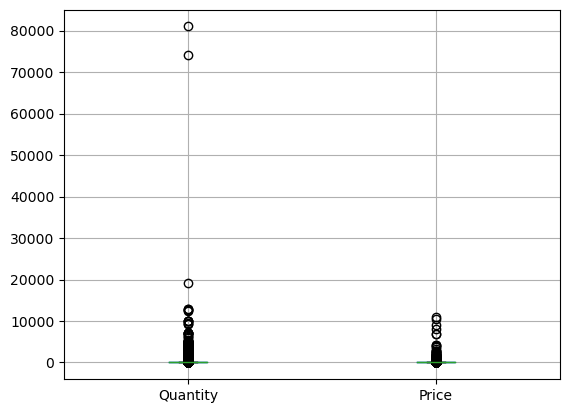

In [13]:
df_proc[["Quantity", "Price"]].boxplot()
plt.show() # Why this line made it to work?

In [14]:
# As we see, "Quantity" and "Price" have outliers. So, we will remove them.

In [15]:
# Removing outliers from the "Quantity" attribute
Q1 = df_proc.Quantity.quantile(0.25)
Q3 = df_proc.Quantity.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_proc = df_proc[(df_proc.Quantity>lower_limit)&(df_proc.Quantity<upper_limit)]


In [16]:
# Removing outliers from the "Price" attribute
Q1 = df_proc.Price.quantile(0.25)
Q3 = df_proc.Price.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR 

df_proc = df_proc[(df_proc.Price>lower_limit)&(df_proc.Price<upper_limit)]


In [17]:
df_proc.count()

Invoice        686023
StockCode      686023
Description    686023
Quantity       686023
InvoiceDate    686023
Price          686023
Customer ID    686023
Country        686023
Day            686023
Month          686023
Year           686023
dtype: int64

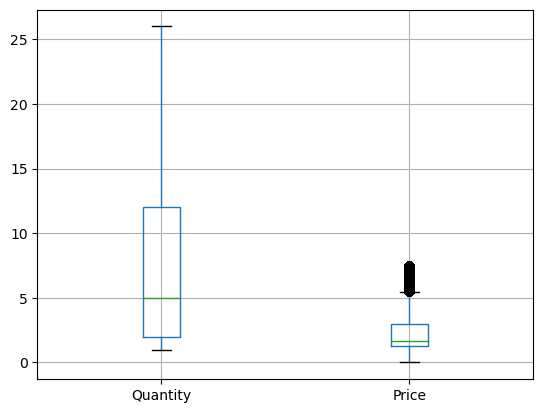

In [18]:
df_proc[["Quantity", "Price"]].boxplot()
plt.show() # Why this line made it to work?